In [198]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import sklearn as sk
import joblib

In [199]:
df = pd.read_csv('datasets\laptop_price.csv',encoding='latin')
df

<>:1: SyntaxWarning: invalid escape sequence '\l'
<>:1: SyntaxWarning: invalid escape sequence '\l'
C:\Users\avdhoot\AppData\Local\Temp\ipykernel_29268\3244557506.py:1: SyntaxWarning: invalid escape sequence '\l'
  df = pd.read_csv('datasets\laptop_price.csv',encoding='latin')


,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,1316,Lenovo,Yoga 500-14ISK,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,638.00
1299,1317,Lenovo,Yoga 900-13ISK,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,1499.00
1300,1318,Lenovo,IdeaPad 100S-14IBR,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,229.00
1301,1319,HP,15-AC110nv (i7-6500U/6GB/1TB/Radeon,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,764.00


In [200]:
df.duplicated().sum()

np.int64(0)

In [201]:
df.drop(columns=['laptop_ID'],inplace=True)

In [202]:
df.duplicated().sum()

np.int64(28)

In [203]:
df = df.drop_duplicates()

In [204]:
df.dtypes

Company              object
Product              object
TypeName             object
Inches              float64
ScreenResolution     object
Cpu                  object
Ram                  object
Memory               object
Gpu                  object
OpSys                object
Weight               object
Price_euros         float64
dtype: object

In [205]:
df.shape

(1275, 12)

In [206]:
df.isnull().sum()

Company             0
Product             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price_euros         0
dtype: int64

In [207]:
df['Price'] = round(df['Price_euros']*102.45).astype('int')
df.drop(columns=['Price_euros'],inplace=True)

C:\Users\avdhoot\AppData\Local\Temp\ipykernel_29268\3086725538.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Price'] = round(df['Price_euros']*102.45).astype('int')
C:\Users\avdhoot\AppData\Local\Temp\ipykernel_29268\3086725538.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=['Price_euros'],inplace=True)


In [208]:
df.sample()

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
457,Microsoft,Surface Laptop,Ultrabook,13.5,Touchscreen 2256x1504,Intel Core M m3-7Y30 2.2GHz,4GB,128GB SSD,Intel HD Graphics 615,Windows 10 S,1.252kg,101323


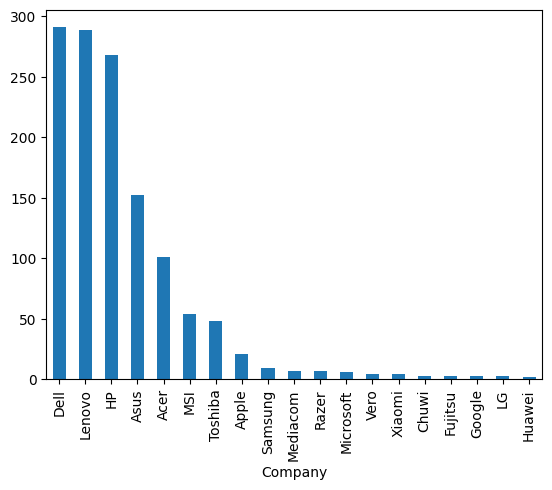

In [209]:
# EDA
#  - Univeriate analysis 
#  - Multiveriate analysis

df['Company'].value_counts().plot(kind='bar')      # Univeriate analysis  just doing analysis on a singel cloumn
plt.show()

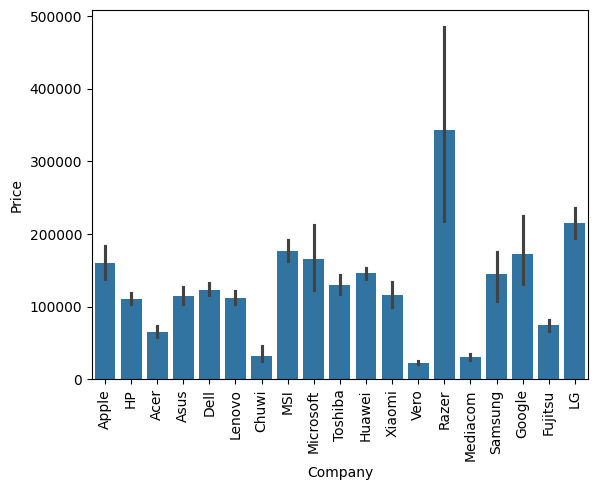

In [210]:
sb.barplot(x=df['Company'], y= df['Price'])
plt.xticks(rotation= 90)
plt.show()

In [211]:
df = df[df.groupby('Company').Company.transform('count')>10].copy()
df['Company'].value_counts()

Company
Dell       291
Lenovo     289
HP         268
Asus       152
Acer       101
MSI         54
Toshiba     48
Apple       21
Name: count, dtype: int64

<Axes: xlabel='Company'>

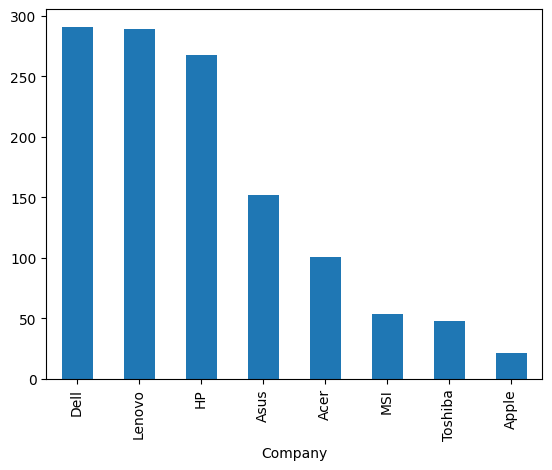

In [212]:
df['Company'].value_counts().plot(kind='bar')

In [213]:
df.sample()

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
1018,Toshiba,Tecra Z40-C-12Z,Notebook,14.0,IPS Panel Full HD 1920x1080,Intel Core i5 6200U 2.3GHz,8GB,256GB SSD,Intel HD Graphics 520,Windows 10,1.47kg,152650


In [214]:
df = df.drop(columns='Product')

<Axes: xlabel='TypeName'>

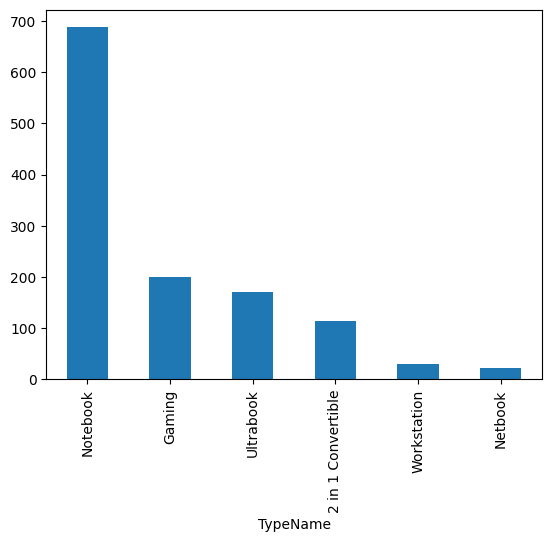

In [215]:
df['TypeName'].value_counts().plot(kind='bar')

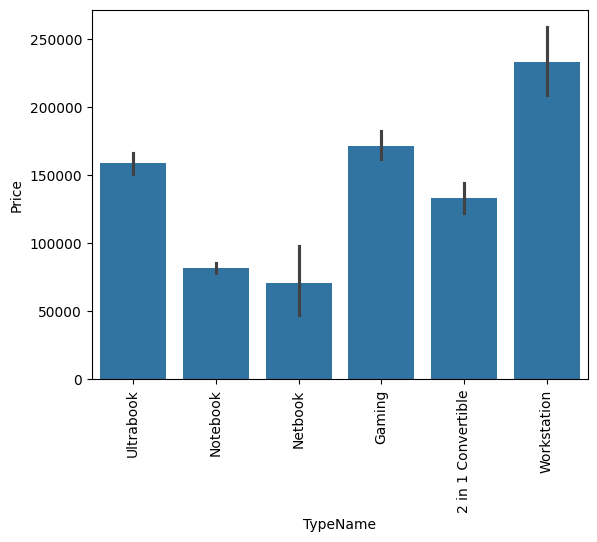

In [216]:
sb.barplot(x=df['TypeName'], y= df['Price'])
plt.xticks(rotation= 90)
plt.show()

<Axes: xlabel='Inches'>

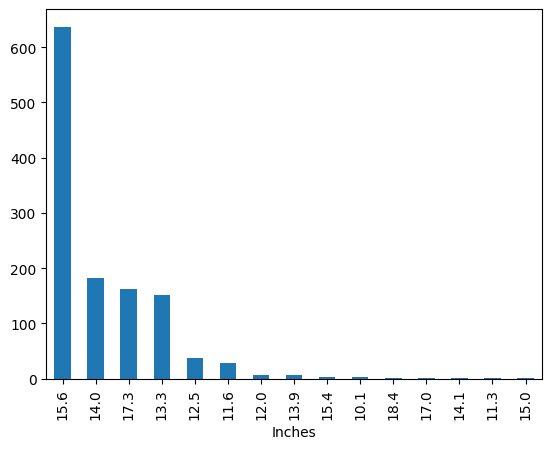

In [217]:
df['Inches'].value_counts().plot(kind='bar')

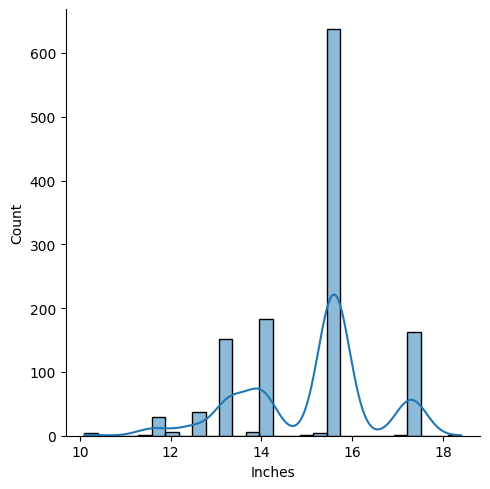

In [218]:
sb.displot(x= df['Inches'],kde=True)

In [219]:
df['ScreenResolution'].value_counts()
b = "IPS Panel Full HD / Touchscreen 1920x1080"
lambda b:b.split()(b).split('x')[0]


<function __main__.<lambda>(b)>

In [220]:
df['X_res'] = df['ScreenResolution'].apply(lambda b:b.split()[-1].split('x')[0])
df['Y_res'] = df['ScreenResolution'].apply(lambda b:b.split()[-1].split('x')[1])

In [221]:
df['Touchscreen'] = df['ScreenResolution'].apply(lambda x:1 if 'Touchscreen' in x else 0)
df['IPS'] = df['ScreenResolution'].apply(lambda x:1 if 'IPS' in x else 0)

In [222]:
df.drop(columns='ScreenResolution',inplace=True)

In [223]:
df.sample()

,Company,TypeName,Inches,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,X_res,Y_res,Touchscreen,IPS
1069,Apple,Ultrabook,12.0,Intel Core M 1.1GHz,8GB,256GB Flash Storage,Intel HD Graphics 515,Mac OS X,0.920kg,133185,2304,1440,0,1


In [224]:
df['Cpu'].value_counts()

Cpu
Intel Core i5 7200U 2.5GHz              183
Intel Core i7 7700HQ 2.8GHz             142
Intel Core i7 7500U 2.7GHz              124
Intel Core i5 8250U 1.6GHz               71
Intel Core i7 8550U 1.8GHz               71
                                       ... 
Intel Pentium Dual Core 4405Y 1.5GHz      1
Intel Core M 6Y54 1.1GHz                  1
AMD E-Series 9000 2.2GHz                  1
Intel Core M 6Y30 0.9GHz                  1
AMD A9-Series 9410 2.9GHz                 1
Name: count, Length: 111, dtype: int64

In [225]:
df['Cpu'] = df['Cpu'].apply(lambda x:" ".join(x.split()[0:3]))

In [226]:
df['Cpu'].value_counts()

Cpu
Intel Core i7               493
Intel Core i5               411
Intel Core i3               134
Intel Celeron Dual           66
Intel Pentium Quad           27
Intel Core M                 16
AMD A9-Series 9420           12
AMD A6-Series 9220            8
AMD A12-Series 9720P          7
Intel Celeron Quad            5
Intel Atom x5-Z8550           4
AMD A8-Series 7410            4
Intel Pentium Dual            3
AMD Ryzen 1700                3
AMD A6-Series A6-9220         2
AMD A9-Series A9-9420         2
AMD A10-Series 9600P          2
AMD A10-Series A10-9620P      2
Intel Xeon E3-1505M           2
AMD E-Series E2-9000e         2
Intel Xeon E3-1535M           2
AMD E-Series 7110             2
AMD A10-Series 9620P          2
AMD E-Series 9000e            1
AMD E-Series E2-6110          1
AMD E-Series 6110             1
AMD FX 9830P                  1
Intel Atom x5-Z8350           1
AMD Ryzen 1600                1
AMD E-Series E2-9000          1
AMD A6-Series 7310            1
AMD 

In [227]:
def series_of_Cpu(text):
    if text=='Intel Core i7' or text=='Intel Core i5' or text=='Intel Core i3' or text== 'Intel Core M':
        return text
    elif text.split()[0]=="Intel":
        return " ".join(text.split()[0:2])
    else:
        return "AMD Processor"

In [228]:
df['Cpu'] = df['Cpu'].apply(series_of_Cpu)

<Axes: xlabel='Cpu'>

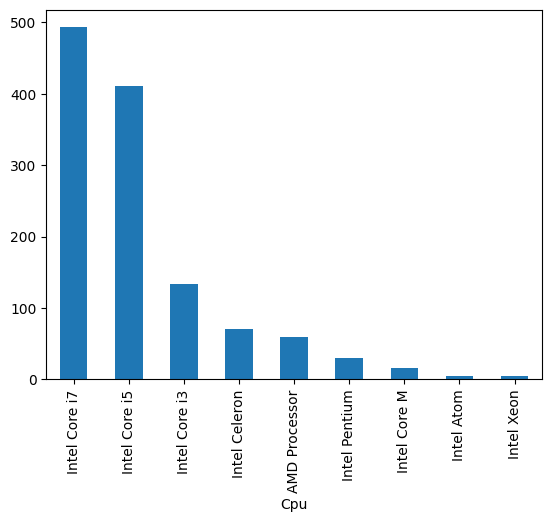

In [229]:
df['Cpu'].value_counts().plot(kind='bar')

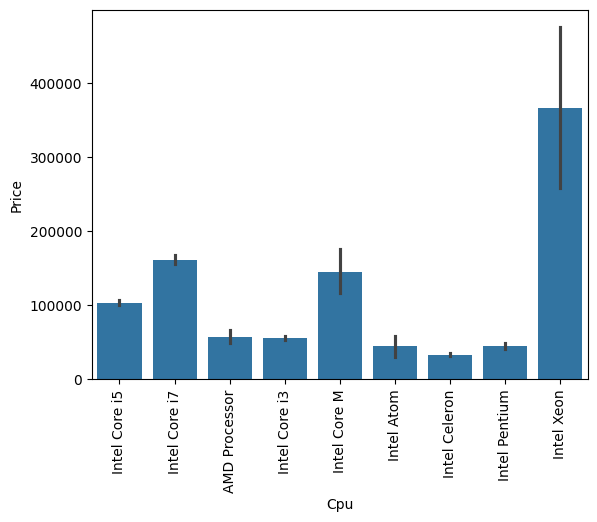

In [230]:
sb.barplot(x=df['Cpu'], y=df['Price'])
plt.xticks(rotation = 90)
plt.show()

In [231]:
df.sample()

,Company,TypeName,Inches,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,X_res,Y_res,Touchscreen,IPS
97,Dell,Notebook,15.6,Intel Core i3,4GB,256GB SSD,AMD Radeon R5 M430,Linux,2.2kg,49688,1920,1080,0,0


In [232]:
df['Ram'].value_counts()

Ram
8GB     595
4GB     351
16GB    186
6GB      34
12GB     25
32GB     15
2GB      14
24GB      3
64GB      1
Name: count, dtype: int64

In [233]:
df['Ram'] = df['Ram'].apply(lambda x : x.replace('GB','')).astype('int')

<Axes: xlabel='Ram'>

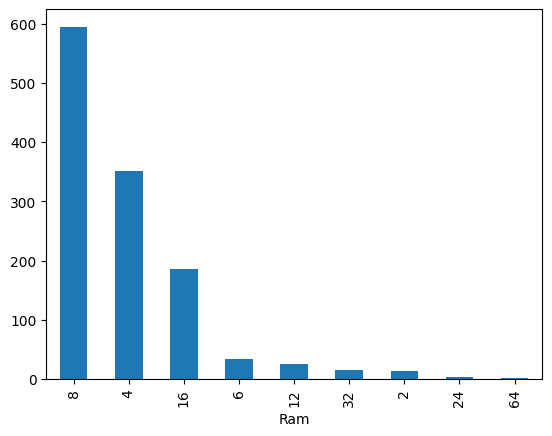

In [234]:
df['Ram'].value_counts().plot(kind='bar')

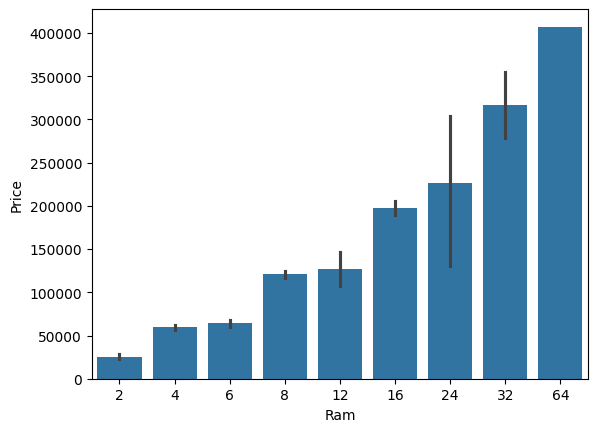

In [235]:
sb.barplot(x=df['Ram'],y=df['Price'])
plt.xticks()
plt.show()

In [236]:
df.sample()

,Company,TypeName,Inches,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,X_res,Y_res,Touchscreen,IPS
885,HP,2 in 1 Convertible,13.3,Intel Core i5,4,256GB SSD,Intel HD Graphics 620,Windows 10,1.28kg,184308,1920,1080,1,0


In [237]:
df['Gpu'].value_counts()

Gpu
Intel HD Graphics 620      265
Intel HD Graphics 520      179
Intel UHD Graphics 620      68
Nvidia GeForce GTX 1050     65
Nvidia GeForce GTX 1060     45
                          ... 
AMD Radeon R5 M315           1
Nvidia Quadro M500M          1
AMD Radeon R7 M360           1
Nvidia Quadro M3000M         1
Nvidia GeForce 960M          1
Name: count, Length: 108, dtype: int64

In [238]:
df['OpSys'].value_counts()

OpSys
Windows 10      1011
No OS             63
Linux             58
Windows 7         45
Chrome OS         22
macOS             13
Mac OS X           8
Windows 10 S       2
Android            2
Name: count, dtype: int64

In [239]:
def combined_OpSys(text):
    if text== 'Windows 10' or text== 'Windows 10 S':
        return 'Windows 10'
    elif text==  'macOS' or text=='Mac OS X ':
        return 'Mac OS'
    elif text== 'Windows 7':
        return text
    elif text== 'Linux':
        return text
    elif text== 'No OS':
        return text
    else:
        return 'Chrome OS/No OS/Other'

In [240]:
df['OpSys'] = df['OpSys'].apply(combined_OpSys)

In [241]:
df['OpSys'].value_counts()

OpSys
Windows 10               1013
No OS                      63
Linux                      58
Windows 7                  45
Chrome OS/No OS/Other      32
Mac OS                     13
Name: count, dtype: int64

<Axes: xlabel='OpSys'>

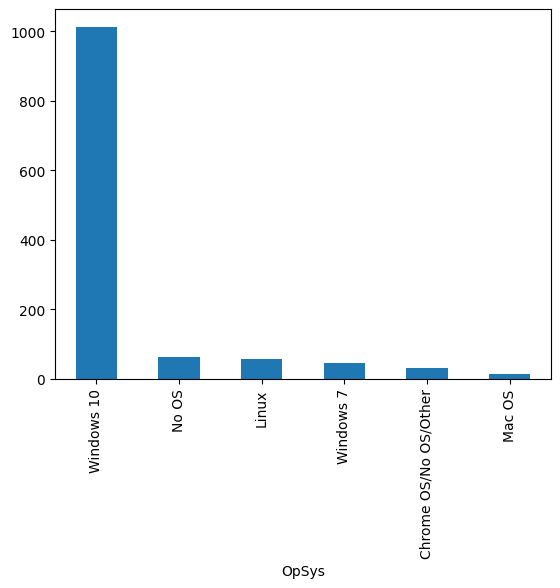

In [242]:
df['OpSys'].value_counts().plot(kind='bar')


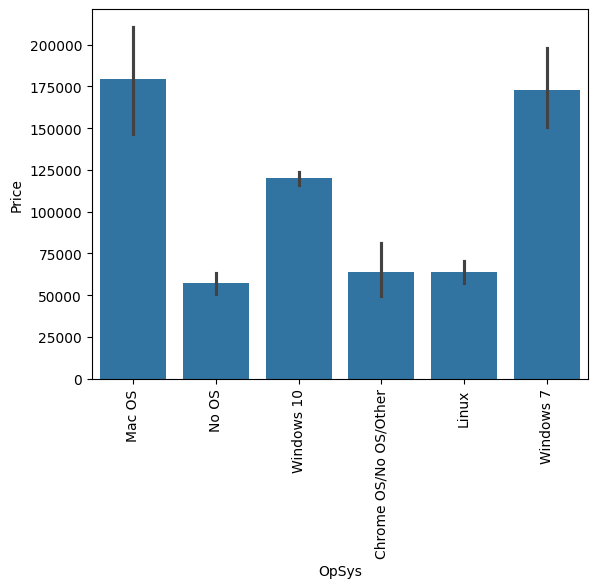

In [243]:
sb.barplot(x=df['OpSys'], y=df['Price'])
plt.xticks(rotation = 90)
plt.show()

In [244]:
df['Weight'].value_counts()

Weight
2.2kg      115
2.1kg       58
2.4kg       42
2.5kg       37
2.3kg       36
          ... 
2.21kg       1
2.191kg      1
1.08kg       1
2.34kg       1
4.0kg        1
Name: count, Length: 175, dtype: int64

In [251]:
df['Weight'] = df['Weight'].apply(lambda x:x.replace('kg','')).astype('float')

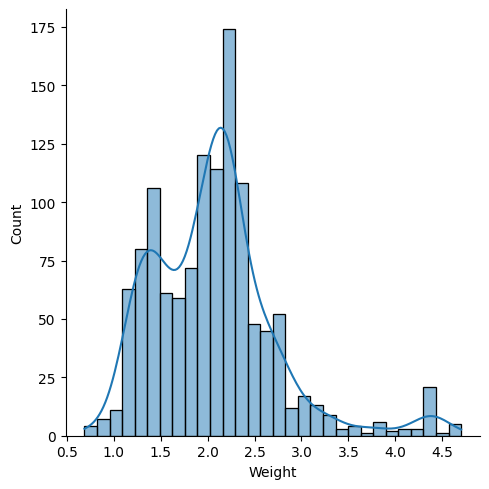

In [252]:
sb.displot(x=df['Weight'],kde = True)

<Axes: xlabel='Weight', ylabel='Price'>

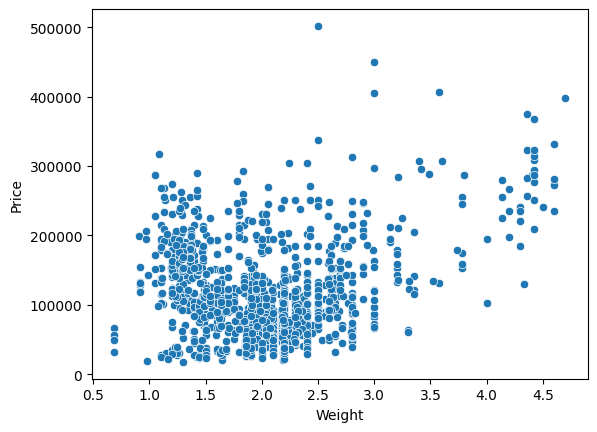

In [255]:
sb.scatterplot(x=df['Weight'],y= df['Price'])

In [245]:
df['Gpu'].value_counts()

Gpu
Intel HD Graphics 620      265
Intel HD Graphics 520      179
Intel UHD Graphics 620      68
Nvidia GeForce GTX 1050     65
Nvidia GeForce GTX 1060     45
                          ... 
AMD Radeon R5 M315           1
Nvidia Quadro M500M          1
AMD Radeon R7 M360           1
Nvidia Quadro M3000M         1
Nvidia GeForce 960M          1
Name: count, Length: 108, dtype: int64

In [246]:
df['Gpu'] = df['Gpu'].apply(lambda x:x.split()[0])


<Axes: xlabel='Gpu'>

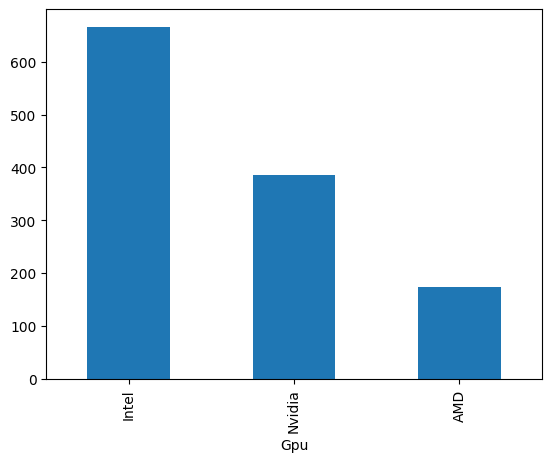

In [247]:
df['Gpu'].value_counts().plot(kind='bar')

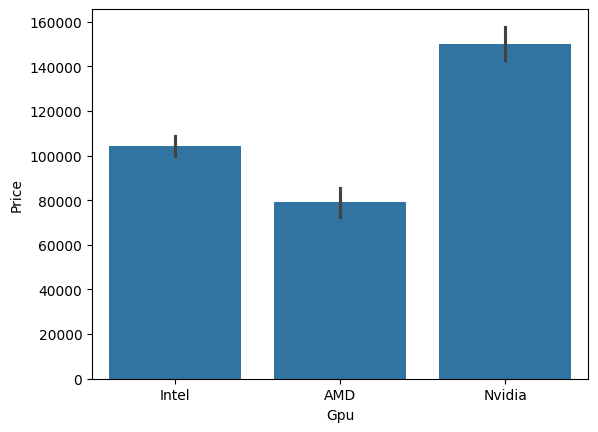

In [248]:
sb.barplot(x=df['Gpu'], y= df['Price'])
plt.show()

In [249]:
df.sample()

,Company,TypeName,Inches,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,X_res,Y_res,Touchscreen,IPS
1150,Lenovo,Notebook,15.6,Intel Core i3,4,1TB HDD,Intel,No OS,1.9kg,34731,1366,768,0,0
